# Projeto EletroMag - Ligar Arduino sem fio Para Mostrar uma Mensagem em um Display LCD
### Camila Junqueira, João Vitor Oliveira, Lucca Nasser, Stephani Ferreira

Imports

In [227]:
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## Esquema das Bobinas
### Diagrama do Modelo Eletrodinâmico do Circuito WPT em abordagem Fasorial

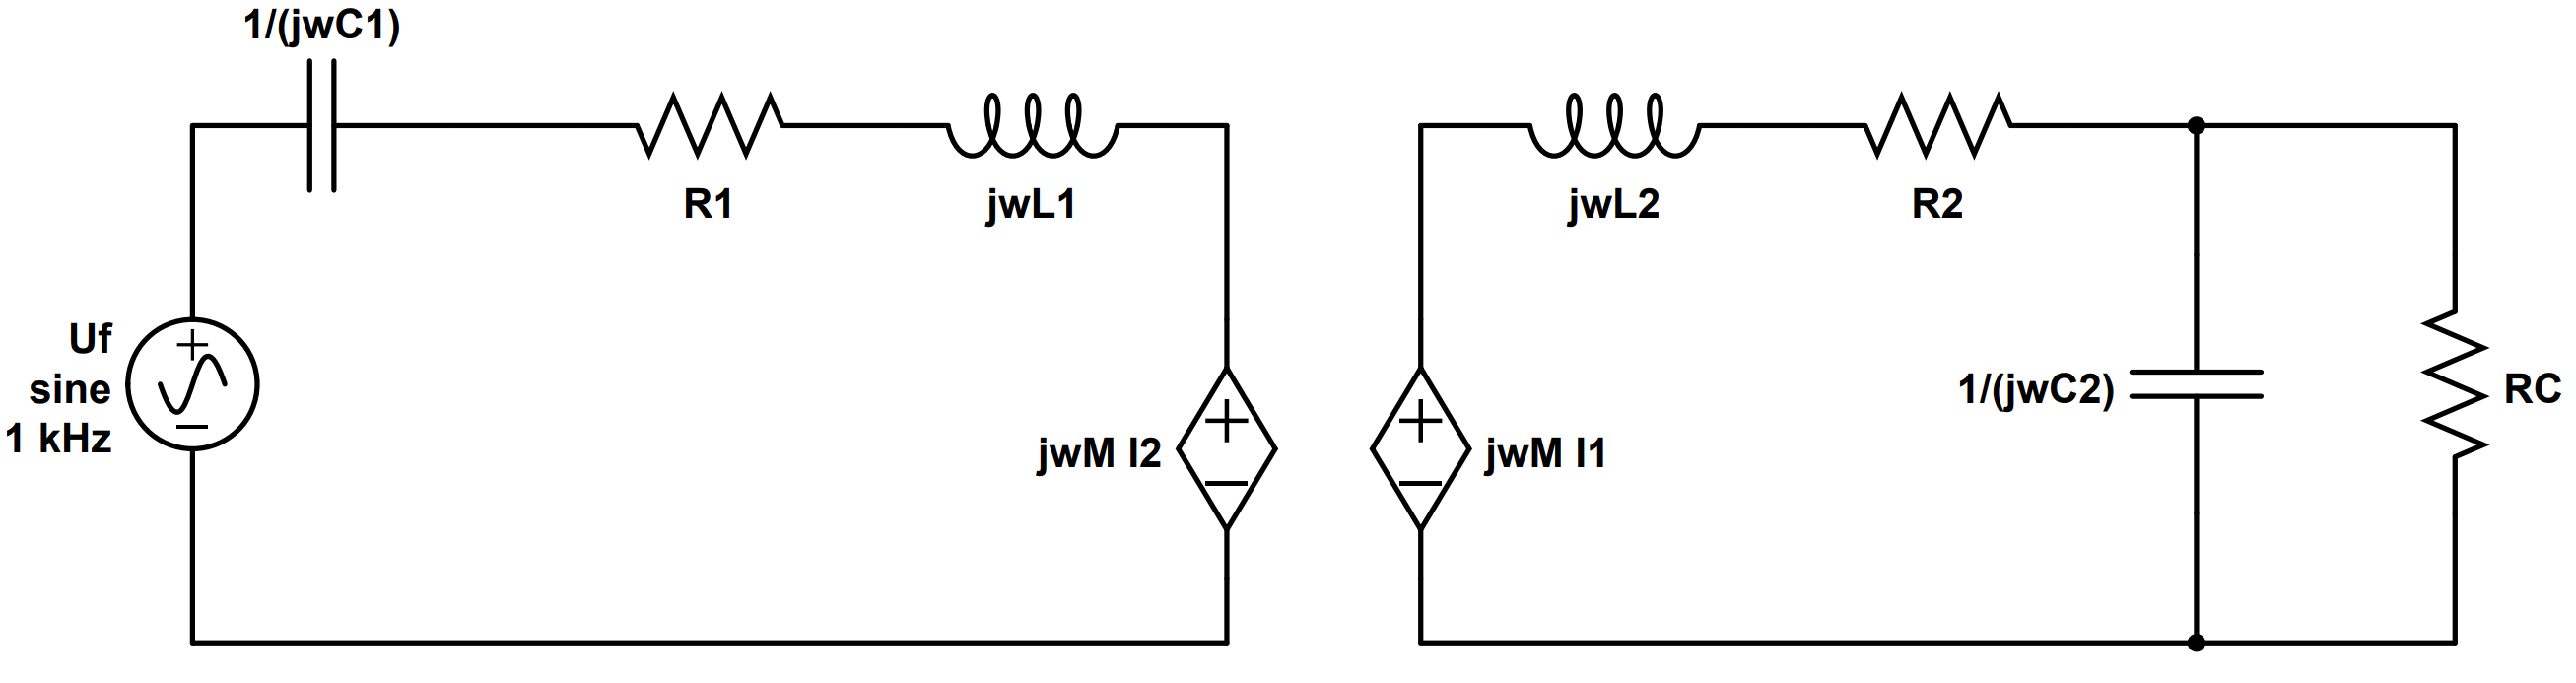

### Definindo os Parâmetros

In [228]:
# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M

### Função de Cálculo das correntes $Î_1$ e $Î_2$

In [229]:
def CalculaLeonardo(Uf, Rc):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

## Simulação
- Escolha dos valores de Frequência de Operação, Capacitores e Indutâncias

### Gráfico $V_2$ x $f$

In [230]:
Uf = 10
Rc = 102
k = 0.1

indices: [34, 35, 36, 37, 38, 39, 40, 13755, 13756, 13757, 13758, 13759, 13760, 13761, 13762, 13763, 13764, 13765, 13766, 13767, 13768, 13769, 13770, 13771, 13772, 13773, 13774, 13775, 13776, 13777, 13778, 13779, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13788, 13789, 13790, 13791, 13792, 13793, 13794, 13795, 13796, 13797, 13798, 13799, 13800, 13801, 13802, 13803, 13804, 13805, 13806, 13807, 13808, 13809, 13810, 13811, 13812, 13813, 13814, 13815, 13816, 13817, 13818, 13819, 13820, 13821, 13822, 13823, 13824, 13825, 13826, 13827, 13828, 13829, 13830, 13831, 13832, 13833, 13834, 13835, 13836, 13837, 13838, 13839, 13840, 13841, 13842, 13843, 13844, 13845, 13846, 13847, 13848, 13849, 13850, 13851, 13852, 13853, 13854, 13855, 13856, 13857, 13858, 13859, 13860, 13861, 13862, 13863, 13864, 13865, 13866, 13867, 13868, 13869, 13870, 13871, 13872, 13873, 13874, 13875, 13876, 13877, 13878, 13879, 13880, 13881, 13882, 13883, 13884, 13885, 13886, 13887, 13888, 13889, 13890, 13891, 138

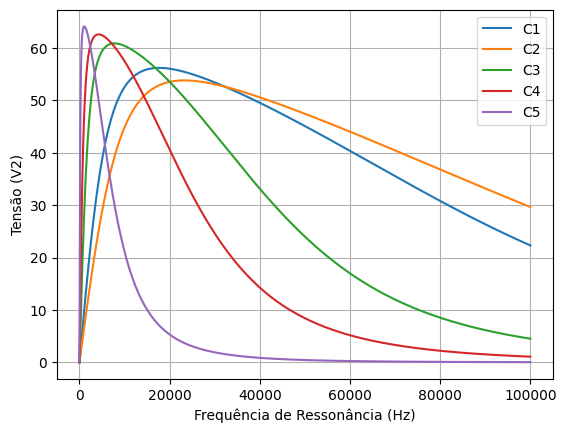

In [231]:
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(1*10**-10,100*10**3,1)

V2_list = []
L_list = []
f_list = []
indices = []
v2_corr = []

Rdc = 0.5

n = 0
for C in capacitores:
    V2_list = []
    L_list = []
    f_list = []
    indices = []
    v2_corr = []

    n = n + 1
    for f in frequencias:
        
        f_list.append(f)

        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        L_list.append(L)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        V2_list.append(abs(V2))
    
    for j, valor in enumerate(V2_list):
        if 10 <= valor <= 12:
            indices.append(j)
            v2_corr.append(valor)
    
    if n == 5:
        print(f'indices: {indices}')
        print(f'V2: {v2_corr}')
        print()
        print(f'Capacitor: C{n},\nÍndices: {indices}')
        for i in indices:
            print(f'Tensão: {V2_list[i]}')
            print(f'Indutância: {L_list[i]}')
            print(f'Frequência: {f_list[i]}')
            print()

    plt.plot(frequencias, V2_list, label="C" + str(n))
    plt.xlabel("Frequência de Ressonância (Hz)")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()
plt.show()

## Simulação

Valores foram mudados na primeira seção do jupyter (definindo parâmetros)

Tensão: 7 a 12 V\
Corrente máxima: 80 mA

Capacitor escolhido: Capacitor 5 ($4,7 uF$)\
Frequência: 13700.00 Hz, Tensão V2: 11.995 V

In [232]:
Tensão: 11.995933305756028
Indutância: 2.8477045607519828e-05
Frequência: 13757.0000000001


f = 13700
C = 4.7*10**-6
R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
L = 2.84e-05

# Lt = 1/((f**2)*4*(pi**2)*C)

w = 2 * pi * f

XC = XC1 = XC2 = 1/(1j * w * C)
XL = XL1 = XL2 = 1j * w * L

M = k * sqrt(L**2)
XM = 1j * w * M

print(XC)
print(XL)
print(XM)

print('---------------')
print(f'L = {L} H')
print(f'R fio = {R} Ohms')
#print(f'f Teste: {1/(2*pi*sqrt(L*C))} Hz')

-2.4717338576160173j
2.4446617393174335j
0.24446617393174333j
---------------
L = 2.84e-05 H
R fio = 0.637 Ohms


In [233]:
i1, i2 = CalculaLeonardo(Uf, Rc)
i1, i2

((13.82289541254198+0.4576072168444465j),
 (-0.338366905232751+4.836772329214764j))

In [234]:
V2 = ((Rc*XC)/(Rc+XC))*i2
abs(V2)

11.980915446144794

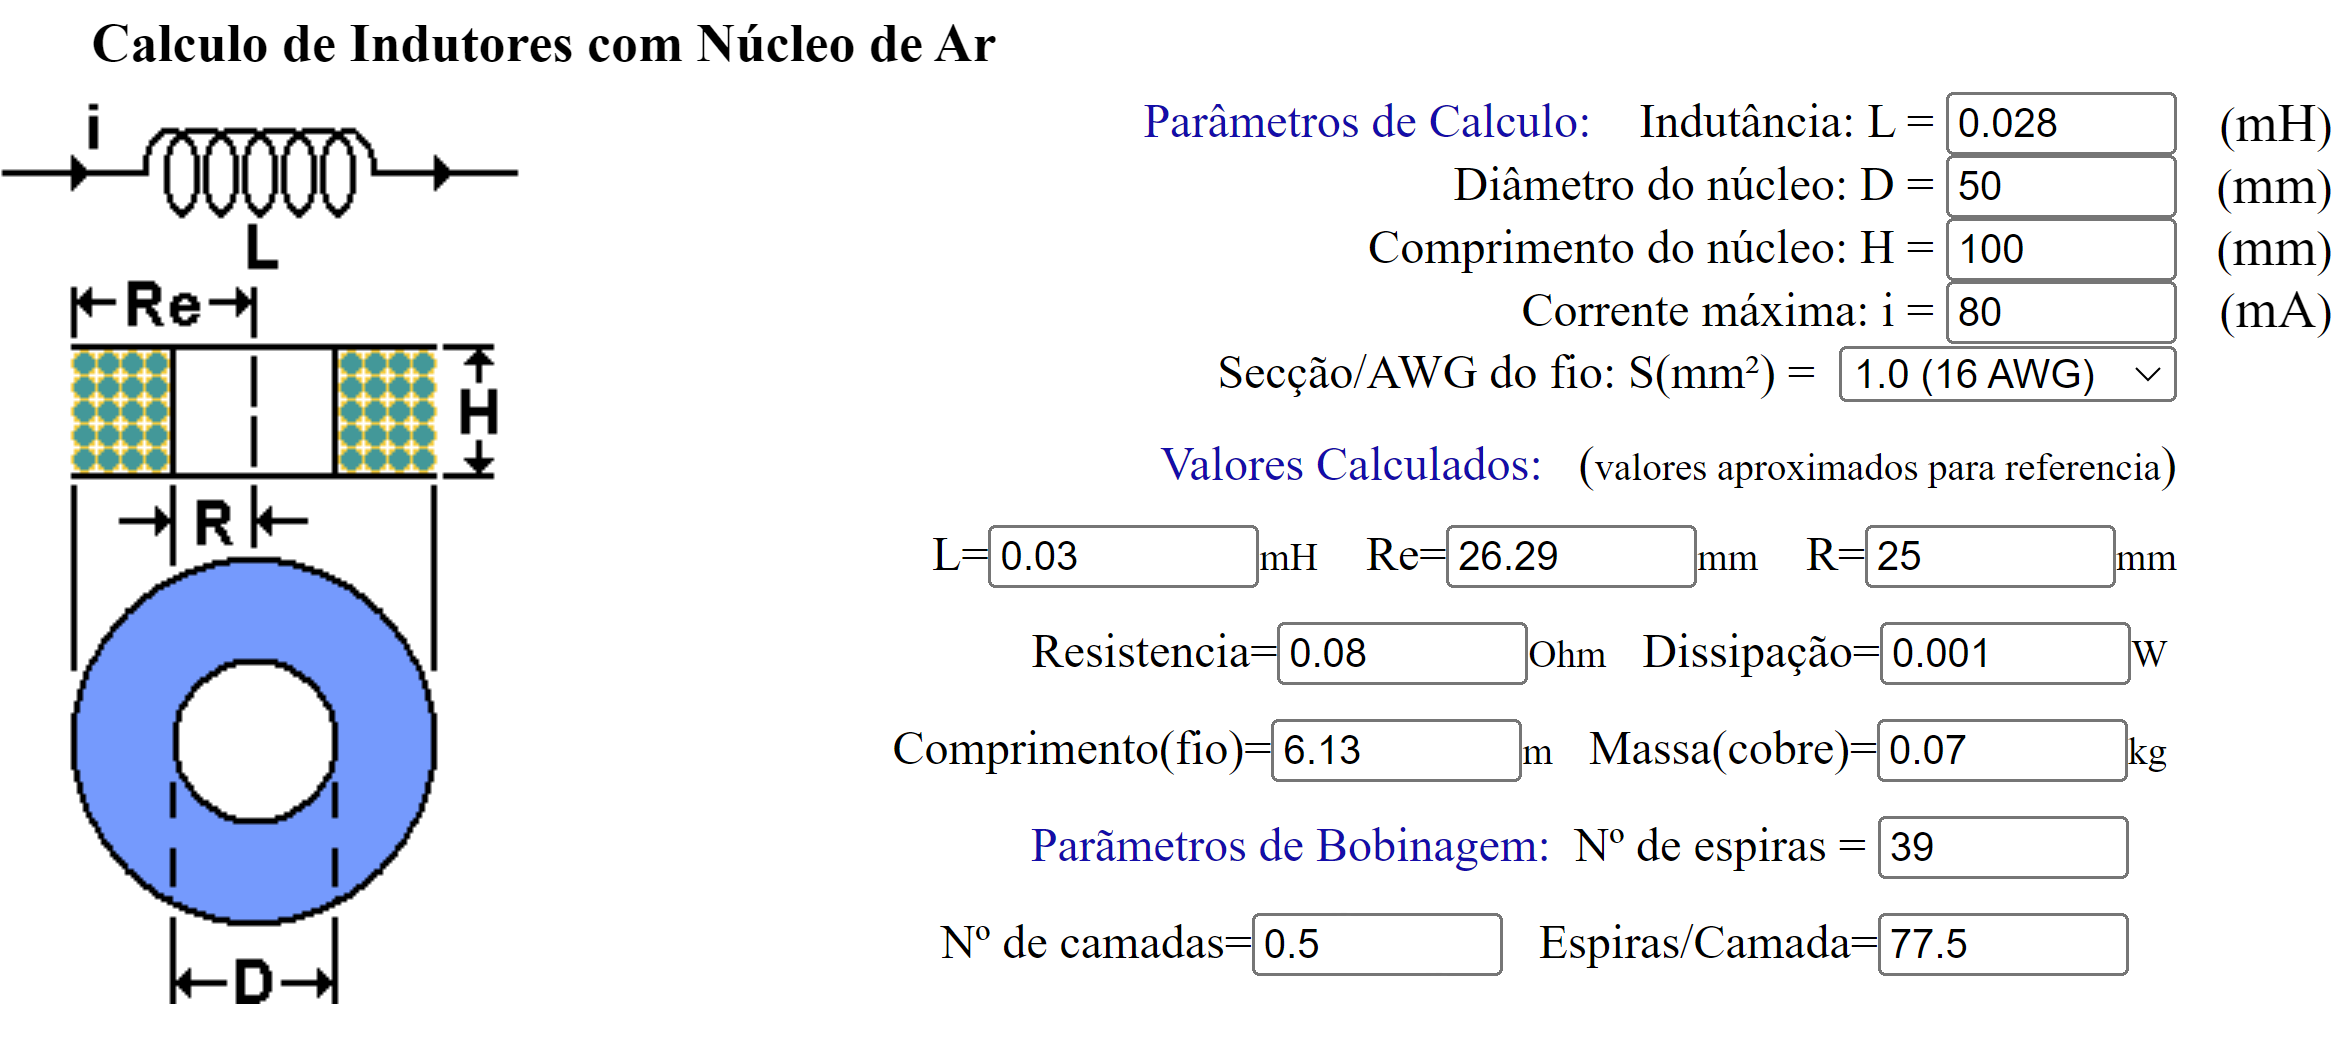

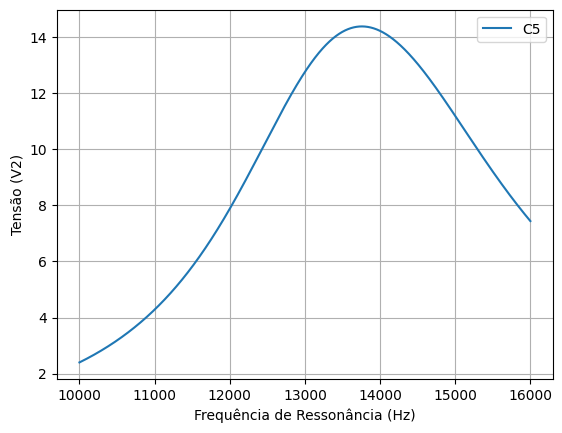

In [237]:
freq_t = np.arange(10000, 16000, 1)
V2_list = []
Uf = 12
Rdc = 0.08
k = 0.1
for f in freq_t:
    w = 2 * pi * f
    XC = XC1 = XC2 = 1/(1j * w * C)
    XL = XL1 = XL2 = 1j * w * L
    
    M = k * sqrt(L**2)
    XM = 1j * w * M
    i1, i2 = CalculaLeonardo(Uf, Rc)
    V2 = ((Rc*XC)/(Rc+XC))*i2
    
    V2_list.append(abs(V2))

plt.plot(freq_t, V2_list, label="C" + str(n))
plt.xlabel("Frequência de Ressonância (Hz)")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

Testes

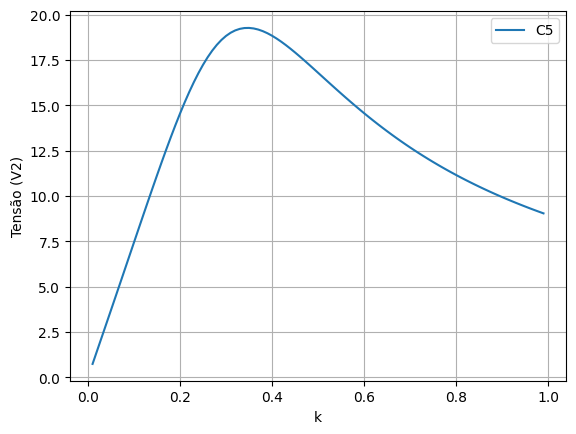

In [238]:
# freq fixa com K variando
freq = 13700
C = 4.7*10**-6

k_list = np.arange(0.01, 1, 0.01)
V2_list = []

for k in k_list:
    M = k * sqrt(L**2)
    XM = 1j * w * M
    i1, i2 = CalculaLeonardo(Uf, Rc)
    V2 = ((Rc*XC)/(Rc+XC))*i2
    V2_list.append(abs(V2))

plt.plot(k_list, V2_list, label="C" + str(n))
plt.xlabel("k")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()